In [2]:
#importing fastai library in cv(computer library)
from fastai.vision.widgets import *
from fastai.vision.all import *

In [3]:
#creating a function to get male and female from input images.
def label_func(fname):
    #getting Gender from file name.
    if int(str(fname)[str(fname).index('_')+1]) == 0:
        return "Male"
    return "Female"

In [4]:
#path of dataset
path = Path('utkface-new/UTKFace')

In [5]:
#syntax for datablock
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    #getting the image files from that path
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    #asks location for output.
    get_y=label_func,
    item_tfms=Resize(128),
    batch_tfms=aug_transforms()
).dataloaders(path)
#loads data according to the rules that we have specified

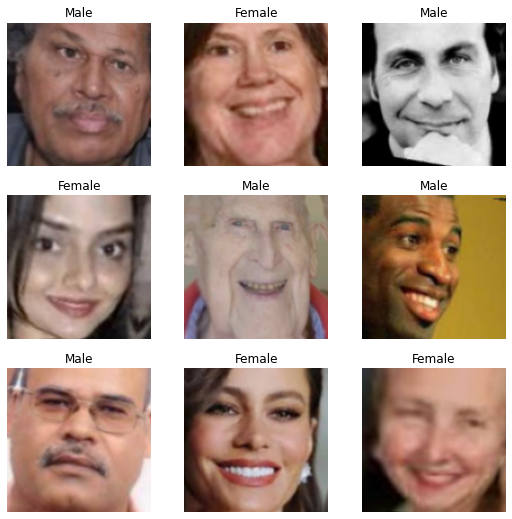

In [6]:
dls.show_batch()

In [12]:
#fastai object that combines data and model for traning.
#we can specify mmodel and error metrics.
learn = vision_learner(dls, resnet50, metrics=accuracy)
#fine tuning for the model for our tasks.
learn.fine_tune(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.516937,0.380527,0.828728,01:58


epoch,train_loss,valid_loss,accuracy,time
0,0.290281,0.238252,0.900021,01:41
1,0.240936,0.237884,0.899810,01:24
2,0.210619,0.191197,0.917950,01:24
3,0.165809,0.177111,0.932715,01:25
4,0.129875,0.167279,0.933980,01:25
5,0.106762,0.174766,0.935457,01:25


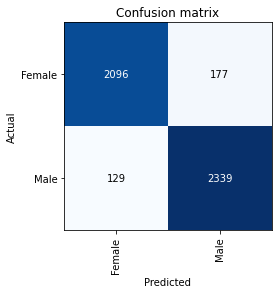

In [13]:
Conf_mat= ClassificationInterpretation.from_learner(learn)
Conf_mat.plot_confusion_matrix()

In [14]:
#exporting the model to pickel
learn.export('gender.pkl')

In [15]:
#predicting the output.
x= learn.predict('utkface-new/UTKFace/45_0_3_20170119183704615.jpg.chip.jpg')
x

('Male', TensorBase(1), TensorBase([0.0080, 0.9920]))